In [143]:
%load_ext autoreload
%autoreload 2
import torch
from torch_geometric.data import Data
from MVC_env import MVC_environement
from DQN_network import Agent
import networkx as nx
from utils import mvc_bb , validation_graph_gen , pickle_save , pickle_load
import random
import numpy as np
import math
from tqdm import tqdm_notebook as tqdm
from collections import namedtuple
from copy import deepcopy
from torch.autograd import Variable
import os
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
from torch_geometric.nn import dense_diff_pool 
from timeit import default_timer as timer
from supervise_gnn import gnn_predict_network , training_data_generator
import os
from pathlib import Path
import itertools
from itertools import cycle
import matplotlib.pyplot as plt
from RL_attack import attack_rl


np.random.seed(19960214)
random.seed(19960214)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
dt = [[] for _ in range(10)]
for i,v in enumerate(att_rl.val_history):
    for j , vv in enumerate(v):
        dt[j].append(vv /opt_results[j])

1.2915129151291511
1.1990165631469978
1.1237961005402866
1.0757575757575757
1.0553618134263296
1.4122111072783718
1.2831050228310503
1.2370512469169634
1.24375
1.1380000000000001


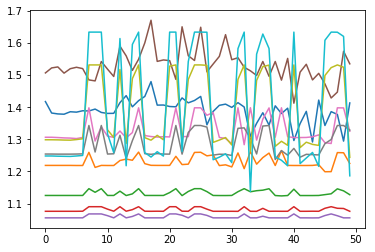

In [166]:
for i in range(10):
    plt.plot(dt[i])
    print(min(dt[i]))

0.3555639296337961

In [162]:
att_rl = attack_rl( num_modify = 100 , T = 50 , K = 50 ,train_epoch = 8 , time_report = True)

seed fixed


In [163]:
att_rl.run_GA(all_graphs)

T  0
crossover  0.02743661403656006
[-1.3125, -1.3333333333333333, -1.46875, -1.4411764705882353, -1.46875, -1.4516129032258065, -1.3333333333333333, -1.393939393939394, -1.53125, -1.4375, -1.4838709677419355, -1.4848484848484849, -1.3225806451612903, -1.5666666666666667, -1.3636363636363635, -1.4375, -1.53125, -1.3636363636363635, -1.40625, -1.40625, -1.4545454545454546, -1.5483870967741935, -1.393939393939394, -1.46875, -1.53125, -1.4545454545454546, -1.40625, -1.28125, -1.5, -1.303030303030303, -1.4242424242424243, -1.53125, -1.393939393939394, -1.3636363636363635, -1.46875, -1.4242424242424243, -1.1818181818181819, -1.393939393939394, -1.3142857142857143, -1.3823529411764706, -1.6, -1.5806451612903225, -1.1764705882352942, -1.4848484848484849, -1.3636363636363635, -1.4242424242424243, -1.3870967741935485, -1.5, -1.393939393939394, -1.375, -1.1666666666666667, -1.1395348837209303, -1.0434782608695652, -1.1395348837209303, -1.4242424242424243, -1.0434782608695652, -1.0888888888888888

validation  9.52176209539175
training  305.5854286290705
T  5
crossover  0.042544130235910416
[-1.6551724137931034, -1.6, -1.5666666666666667, -1.4814814814814814, -1.53125, -1.3703703703703705, -1.4137931034482758, -1.5, -1.56, -1.4375, -1.46875, -1.4166666666666667, -1.4545454545454546, -1.4545454545454546, -1.4516129032258065, -1.4516129032258065, -1.4516129032258065, -1.4482758620689655, -1.3103448275862069, -1.4375, -1.4375, -1.40625, -1.4375, -1.3928571428571428, -1.4242424242424243, -1.4242424242424243, -1.4242424242424243, -1.4242424242424243, -1.4242424242424243, -1.4193548387096775, -1.4166666666666667, -1.411764705882353, -1.40625, -1.40625, -1.40625, -1.393939393939394, -1.393939393939394, -1.393939393939394, -1.3636363636363635, -1.393939393939394, -1.3870967741935485, -1.3870967741935485, -1.3076923076923077, -1.3076923076923077, -1.3823529411764706, -1.3823529411764706, -1.3333333333333333, -1.3529411764705883, -1.3055555555555556, -1.5789473684210527, -1.090909090909090

validation  10.095221925526857
training  307.59563821181655
T  10
crossover  0.18377386778593063
[-1.8846153846153846, -1.56, -1.6, -1.5666666666666667, -1.53125, -1.6551724137931034, -1.5333333333333334, -1.5, -1.46875, -1.46875, -1.5357142857142858, -1.5909090909090908, -1.4242424242424243, -1.4545454545454546, -1.4848484848484849, -1.4838709677419355, -1.4193548387096775, -1.4516129032258065, -1.4516129032258065, -1.4375, -1.4375, -1.4375, -1.40625, -1.4375, -1.393939393939394, -1.4242424242424243, -1.4242424242424243, -1.4242424242424243, -1.4242424242424243, -1.3636363636363635, -1.4193548387096775, -1.4193548387096775, -1.411764705882353, -1.3703703703703705, -1.5185185185185186, -1.375, -1.40625, -1.40625, -1.393939393939394, -1.3571428571428572, -1.3870967741935485, -1.3870967741935485, -1.3823529411764706, -1.3793103448275863, -1.40625, -1.3714285714285714, -1.3714285714285714, -1.4090909090909092, -1.3611111111111112, -1.5714285714285714, -1.1136363636363635, -1.1190476190476

validation  10.111232448369265
training  307.7731344215572
T  15
crossover  0.05008462443947792
[-2.0, -2.0, -1.8, -1.5384615384615385, -1.6071428571428572, -1.7777777777777777, -1.6428571428571428, -1.7037037037037037, -1.5862068965517242, -1.5517241379310345, -1.5666666666666667, -1.6, -1.5555555555555556, -1.5, -1.5357142857142858, -1.53125, -1.53125, -1.46875, -1.4848484848484849, -1.5161290322580645, -1.4375, -1.3571428571428572, -1.4242424242424243, -1.4545454545454546, -1.4838709677419355, -1.5806451612903225, -1.5483870967741935, -1.5, -1.46875, -1.4375, -1.375, -1.40625, -1.4242424242424243, -1.4848484848484849, -1.4545454545454546, -1.4545454545454546, -1.3636363636363635, -1.4242424242424243, -1.4242424242424243, -1.4545454545454546, -1.5483870967741935, -1.4838709677419355, -1.411764705882353, -1.411764705882353, -1.411764705882353, -1.40625, -1.40625, -1.3823529411764706, -1.375, -1.3428571428571427, -1.4375, -1.2894736842105263, -1.4, -1.065217391304348, -1.19512195121951

validation  9.691710516810417
training  296.60543715953827
T  20
crossover  0.18750937283039093
[-1.65, -1.7142857142857142, -1.5625, -1.6818181818181819, -1.64, -1.6071428571428572, -1.5925925925925926, -1.6206896551724137, -1.6923076923076923, -1.6071428571428572, -1.6206896551724137, -1.6153846153846154, -1.3333333333333333, -1.6, -1.6, -1.7727272727272727, -1.5714285714285714, -1.4333333333333333, -1.5666666666666667, -1.5555555555555556, -1.5555555555555556, -1.45, -1.6818181818181819, -1.4285714285714286, -1.5357142857142858, -1.5666666666666667, -1.53125, -2.0, -1.4838709677419355, -1.5, -1.5, -1.5, -1.5, -1.5833333333333333, -1.5, -1.4642857142857142, -1.4838709677419355, -1.4838709677419355, -1.4074074074074074, -1.619047619047619, -1.4761904761904763, -1.4545454545454546, -1.4545454545454546, -1.4545454545454546, -1.4444444444444444, -1.5714285714285714, -1.5454545454545454, -1.3571428571428572, -1.0555555555555556, -1.7142857142857142, -1.0425531914893618, -1.175, -1.5555555

validation  10.28474561497569
training  300.77903981134295
T  25
crossover  0.18725311011075974
[-1.6666666666666667, -1.4285714285714286, -1.6666666666666667, -1.6785714285714286, -1.6785714285714286, -1.6296296296296295, -1.6923076923076923, -1.6785714285714286, -1.6551724137931034, -1.8846153846153846, -1.6071428571428572, -1.4230769230769231, -1.5666666666666667, -1.4333333333333333, -1.72, -1.6666666666666667, -1.5555555555555556, -1.6363636363636365, -1.6206896551724137, -1.6071428571428572, -1.3571428571428572, -1.5714285714285714, -1.6071428571428572, -1.6, -1.5666666666666667, -1.5925925925925926, -1.4482758620689655, -1.3636363636363635, -1.75, -1.4583333333333333, -1.5, -1.5357142857142858, -1.5, -1.5, -1.565217391304348, -1.4838709677419355, -1.3548387096774193, -1.4333333333333333, -1.4583333333333333, -1.6, -1.4848484848484849, -1.3157894736842106, -1.3125, -1.46875, -1.5714285714285714, -1.3928571428571428, -1.5384615384615385, -1.4193548387096775, -1.40625, -1.4, -1.256

validation  9.74569371342659
training  299.34850477054715
T  30
crossover  0.04919448122382164
[-1.5, -1.5789473684210527, -1.5, -1.8333333333333333, -1.6666666666666667, -1.75, -1.5666666666666667, -1.5806451612903225, -1.6, -1.3888888888888888, -1.7777777777777777, -1.6071428571428572, -1.4285714285714286, -1.6, -1.5666666666666667, -1.5333333333333334, -1.40625, -1.5, -1.5416666666666667, -1.393939393939394, -1.3636363636363635, -1.4848484848484849, -1.4193548387096775, -1.6206896551724137, -1.5555555555555556, -1.4375, -1.5, -1.6071428571428572, -1.6785714285714286, -1.3636363636363635, -1.5909090909090908, -1.4827586206896552, -1.5555555555555556, -1.5555555555555556, -1.2647058823529411, -1.4411764705882353, -1.52, -1.46875, -1.4782608695652173, -1.5333333333333334, -1.393939393939394, -1.3225806451612903, -1.5925925925925926, -1.3125, -1.5666666666666667, -1.5357142857142858, -1.5, -1.8076923076923077, -1.7692307692307692, -1.411764705882353, -1.4333333333333333, -1.021739130434

validation  9.897023975849152
training  301.4026576690376
T  35
crossover  0.047595441341400146
[-1.8461538461538463, -1.6071428571428572, -1.3461538461538463, -1.5925925925925926, -1.68, -1.5806451612903225, -1.3571428571428572, -1.6, -1.3214285714285714, -1.3870967741935485, -1.4814814814814814, -1.5357142857142858, -1.3636363636363635, -1.4827586206896552, -1.3823529411764706, -1.5333333333333334, -1.5517241379310345, -1.34375, -1.4, -1.4, -1.3333333333333333, -1.4545454545454546, -1.3571428571428572, -1.173913043478261, -1.5161290322580645, -1.3448275862068966, -1.46875, -1.5555555555555556, -1.4333333333333333, -1.393939393939394, -1.4545454545454546, -1.3870967741935485, -1.2692307692307692, -1.4615384615384615, -1.4137931034482758, -1.53125, -1.4666666666666666, -1.3333333333333333, -1.4, -1.3214285714285714, -1.375, -1.4848484848484849, -1.4333333333333333, -1.4, -1.2702702702702702, -1.2972972972972974, -1.5185185185185186, -1.263157894736842, -1.2105263157894737, -1.303030303

validation  9.31725188717246
training  303.3621665760875
T  40
crossover  0.04900858923792839
[-2.0588235294117645, -1.4782608695652173, -2.1, -1.5, -1.7272727272727273, -1.6, -1.4, -1.5517241379310345, -1.7692307692307692, -1.6, -1.5, -1.53125, -1.5172413793103448, -1.5172413793103448, -1.5384615384615385, -1.5833333333333333, -1.6, -1.6785714285714286, -1.3076923076923077, -1.4242424242424243, -1.4242424242424243, -1.4516129032258065, -1.5185185185185186, -1.6, -1.4285714285714286, -1.4642857142857142, -1.8461538461538463, -1.2121212121212122, -1.4482758620689655, -1.5925925925925926, -1.375, -1.3125, -1.4333333333333333, -1.3870967741935485, -1.5806451612903225, -1.6206896551724137, -1.2058823529411764, -1.3823529411764706, -1.3529411764705883, -1.40625, -1.28125, -1.6956521739130435, -1.3714285714285714, -1.7037037037037037, -1.3333333333333333, -1.3636363636363635, -1.393939393939394, -1.2580645161290323, -1.2580645161290323, -1.2580645161290323, -1.0909090909090908, -1.1794871794

validation  9.641853865236044
training  314.90369341149926
T  45
crossover  0.1646980494260788
[-1.5357142857142858, -1.4285714285714286, -1.5, -1.3478260869565217, -1.565217391304348, -1.8, -1.5806451612903225, -1.4838709677419355, -1.3870967741935485, -1.4193548387096775, -1.5357142857142858, -1.5333333333333334, -1.4242424242424243, -1.4838709677419355, -1.5172413793103448, -1.5172413793103448, -1.4827586206896552, -1.9130434782608696, -1.6, -1.75, -1.411764705882353, -1.2647058823529411, -1.4333333333333333, -1.4, -1.64, -1.393939393939394, -1.3636363636363635, -1.393939393939394, -1.4615384615384615, -1.2941176470588236, -1.2941176470588236, -1.4375, -1.3714285714285714, -1.3714285714285714, -1.3714285714285714, -1.3055555555555556, -1.5483870967741935, -1.3823529411764706, -1.5862068965517242, -1.2857142857142858, -1.3333333333333333, -1.4242424242424243, -1.4242424242424243, -1.4444444444444444, -1.2972972972972974, -1.3529411764705883, -1.5517241379310345, -1.6206896551724137, 

validation  9.47455022111535
training  311.5787497460842


In [167]:
att_rl.save_weight()

In [248]:
v = generator.val_history[:]
'''
for i in range(len(v)):
    for j in range(len(v[i])):
        v[i][j] /= opt_results[j]
for i in range(len(v)):
    plt.plot(v[i])
'''


'\nfor i in range(len(v)):\n    for j in range(len(v[i])):\n        v[i][j] /= opt_results[j]\nfor i in range(len(v)):\n    plt.plot(v[i])\n'

0.14448979591836736
0.15183673469387754
0.1469387755102041
0.1404081632653061
0.1306122448979592
0.13714285714285715
0.14775510204081632
0.1469387755102041
0.14204081632653062
0.1493877551020408
0.14122448979591837
0.15183673469387754
0.14612244897959184
0.13959183673469389
0.15510204081632653
0.16408163265306122
0.1363265306122449
0.14285714285714285
0.15591836734693879
0.1510204081632653
0.1346938775510204
0.1346938775510204
0.16244897959183674
0.14857142857142858
0.14857142857142858
0.1493877551020408
0.15428571428571428
0.15183673469387754
0.12163265306122449
0.15755102040816327
0.14612244897959184
0.13877551020408163
0.14775510204081632
0.16979591836734695
0.1363265306122449
0.16408163265306122
0.15346938775510205
0.16244897959183674
0.16
0.18857142857142858
0.12816326530612246
0.13387755102040816
0.16
0.1469387755102041
0.15428571428571428
0.15591836734693879
0.14857142857142858
0.1363265306122449
0.14448979591836736
0.14857142857142858
0.045714285714285714
0.06938775510204082
0.

0.0653061224489796
0.0653061224489796
0.0653061224489796
0.04081632653061224
0.04081632653061224
0.04081632653061224
0.04081632653061224
0.04081632653061224
0.04081632653061224
0.04081632653061224
0.04081632653061224
0.09061224489795919
0.09061224489795919
0.09061224489795919
0.09061224489795919
0.10938775510204081
0.10938775510204081
0.10938775510204081
0.10938775510204081
0.10938775510204081
0.10938775510204081
0.10938775510204081
0.05795918367346939
0.05795918367346939
0.05795918367346939
0.05795918367346939
0.05795918367346939
0.08816326530612245
0.08816326530612245
0.08816326530612245
0.08816326530612245
0.08816326530612245
0.09061224489795919
0.09061224489795919
0.09061224489795919
0.06938775510204082
0.045714285714285714
0.045714285714285714
0.045714285714285714
0.10285714285714286
0.10285714285714286
0.10285714285714286
0.09551020408163265
0.04244897959183674
0.0653061224489796
0.0653061224489796
0.0653061224489796
0.0653061224489796
0.0653061224489796
0.0653061224489796
0.0653

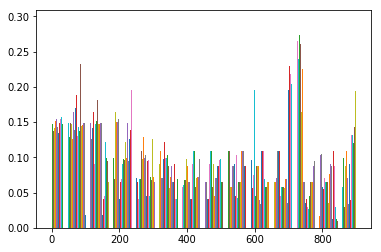

In [131]:

for i , g in enumerate(att_rl.graph_list):
    plt.bar(i,nx.density(g))
    print(nx.density(g))

In [241]:
generator = training_data_generator( K = 50 , train_epoch = 150 , time_report=True , T = 45 ,
                                    device = 'cuda:1' , num_modify = 20 , 
                                    train_on_whole = True , original_graph_distribution = ('er' , 0.05) )
generator.run_GA(all_graphs)

seed fixed
T  0
crossover  0.01823817566037178
selection  108.4271882288158
validation  9.451044924557209
training  104.22245180234313
T  1
crossover  0.025394029915332794
selection  160.74349700659513
validation  9.292061399668455
training  149.51300408691168
T  2
crossover  0.030888628214597702
selection  151.950966399163
validation  9.071771245449781
training  180.09697792306542
T  3
crossover  0.03623293340206146
selection  157.75574320554733
validation  9.12766744941473
training  195.8797919563949
T  4
crossover  0.04214565455913544
selection  142.01449378952384
validation  9.201911501586437
training  218.44255796819925
T  5
crossover  0.04797280579805374
selection  116.90827282890677
validation  9.13306287676096
training  237.87310185283422
T  6
crossover  0.055037908256053925
selection  113.3276549950242
validation  8.981187213212252
training  261.7791569083929
T  7
crossover  0.05388631299138069
selection  114.41967357322574
validation  8.8644268065691
training  278.19221920520

In [253]:
generator.save_weight()

In [28]:
graph_size_list = [50]
graph_type_list = ['er' , 'ba']
density_list = [0.15,0.3,0.5,0.7,0.8]

parameter_list = list(itertools.product(graph_size_list , graph_type_list ,density_list))
N = len(parameter_list)
performance_dict = {}

VALIDATION_GRAPH_NUM = 100

all_graphs = []
opt_results = []
for i in range(N):
    train_size = parameter_list[i][0]
    train_type = parameter_list[i][1]
    train_density = parameter_list[i][2]
    
    train_graphs = validation_graph_gen(n = train_size , p = train_density 
                                        , num = VALIDATION_GRAPH_NUM , graph_type=train_type)
    
    all_graphs.append(train_graphs)

for i in range(N):
    
    cur_res = []
    
    for j in tqdm(range(VALIDATION_GRAPH_NUM)):
        cur_g = all_graphs[i][j]
        C = mvc_bb(cur_g , len(cur_g.nodes()) , [])
        cur_res.append(len(C))
    opt_results.append(sum(cur_res)/len(cur_res))



900

In [99]:
agent = Agent(fix_seed = True,device = 'cuda:1',fitted_Q=False , replay_size = 1)
agent.load_weights('rl_attack_model/tmp.pkl')
for i in range(N):
    print(agent.get_val_result_batch(all_graphs[i]) / opt_results[i])

1.2961254612546125
1.2168737060041408
1.1249706365985437
1.0759803921568627
1.0555797733217087
1.1652293894446362
1.3013698630136987
1.2529460126061933
1.2984375
1.2493333333333332


In [176]:
training_graphs = cycle(att_rl.graph_list[:])
num_validation=200
validation_per_epoch=70
agent = Agent(fix_seed = True,device = 'cuda:1',fitted_Q = False , replay_size = 500000 , adaption_test=False , 
              lr = 1e-4,weight_decay = 0.0001 )
#agent.load_weights('rl_attack_model/tmp.pkl') #pretrain policy 
N = len(all_graphs)

val_result = [[] for _ in range(len(all_graphs))]

for e in tqdm(range( num_validation * validation_per_epoch + 1)):
    g = next(training_graphs)
    #g = nx.erdos_renyi_graph(n = 50 , p = .15)
    g.remove_edges_from(nx.selfloop_edges(g))
    while(nx.density(g) < 0.03):
        g = next(training_graphs)
        g.remove_edges_from(nx.selfloop_edges(g))
    agent.train_with_graph(g)
    
    if e % validation_per_epoch == 0:
        for i in range(N):
            val_result[i].append(agent.get_val_result_batch(all_graphs[i]) / opt_results[i])

0 1.0187576875768758
1 1.019927536231884
2 1.0234907211651398
3 1.0218360071301247
4 1.0233217088055797
5 1.0351845463953089
6 1.0308219178082192
7 1.0422033433817484
8 1.0025
9 1.0


Text(0.5, 1.0, 'training with generated graphs')

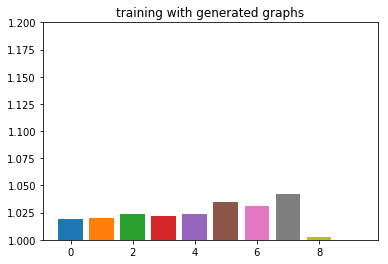

In [177]:
for i,v in enumerate(val_result):
    plt.bar(i,min(v))
    print(i,min(v))
plt.ylim(1,1.2)
plt.title('training with generated graphs')

Text(0.5, 1.0, 'training with generated graphs')

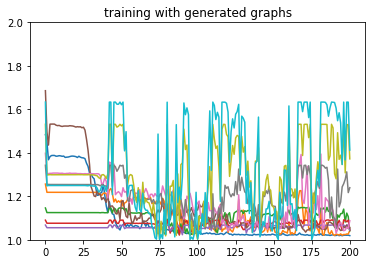

In [184]:
for i,v in enumerate(val_result[:]):
    plt.plot(v)
plt.ylim(1,2)
plt.title('training with generated graphs')

In [204]:
#agent.load_weights('supervised_model/tmp.pkl') #pretrain policy 
#agent.load_weights('rl_attack_model/tmp.pkl')
g = nx.erdos_renyi_graph(n = 50 , p = .1)
agent.get_val_result([g]) , len(mvc_bb(g))

(29.0, 29)

In [189]:
opt_results

[32.52, 38.64, 42.57, 44.88, 45.88, 28.99, 35.04, 36.49, 32.0, 30.0]